In [1]:
import pygmt

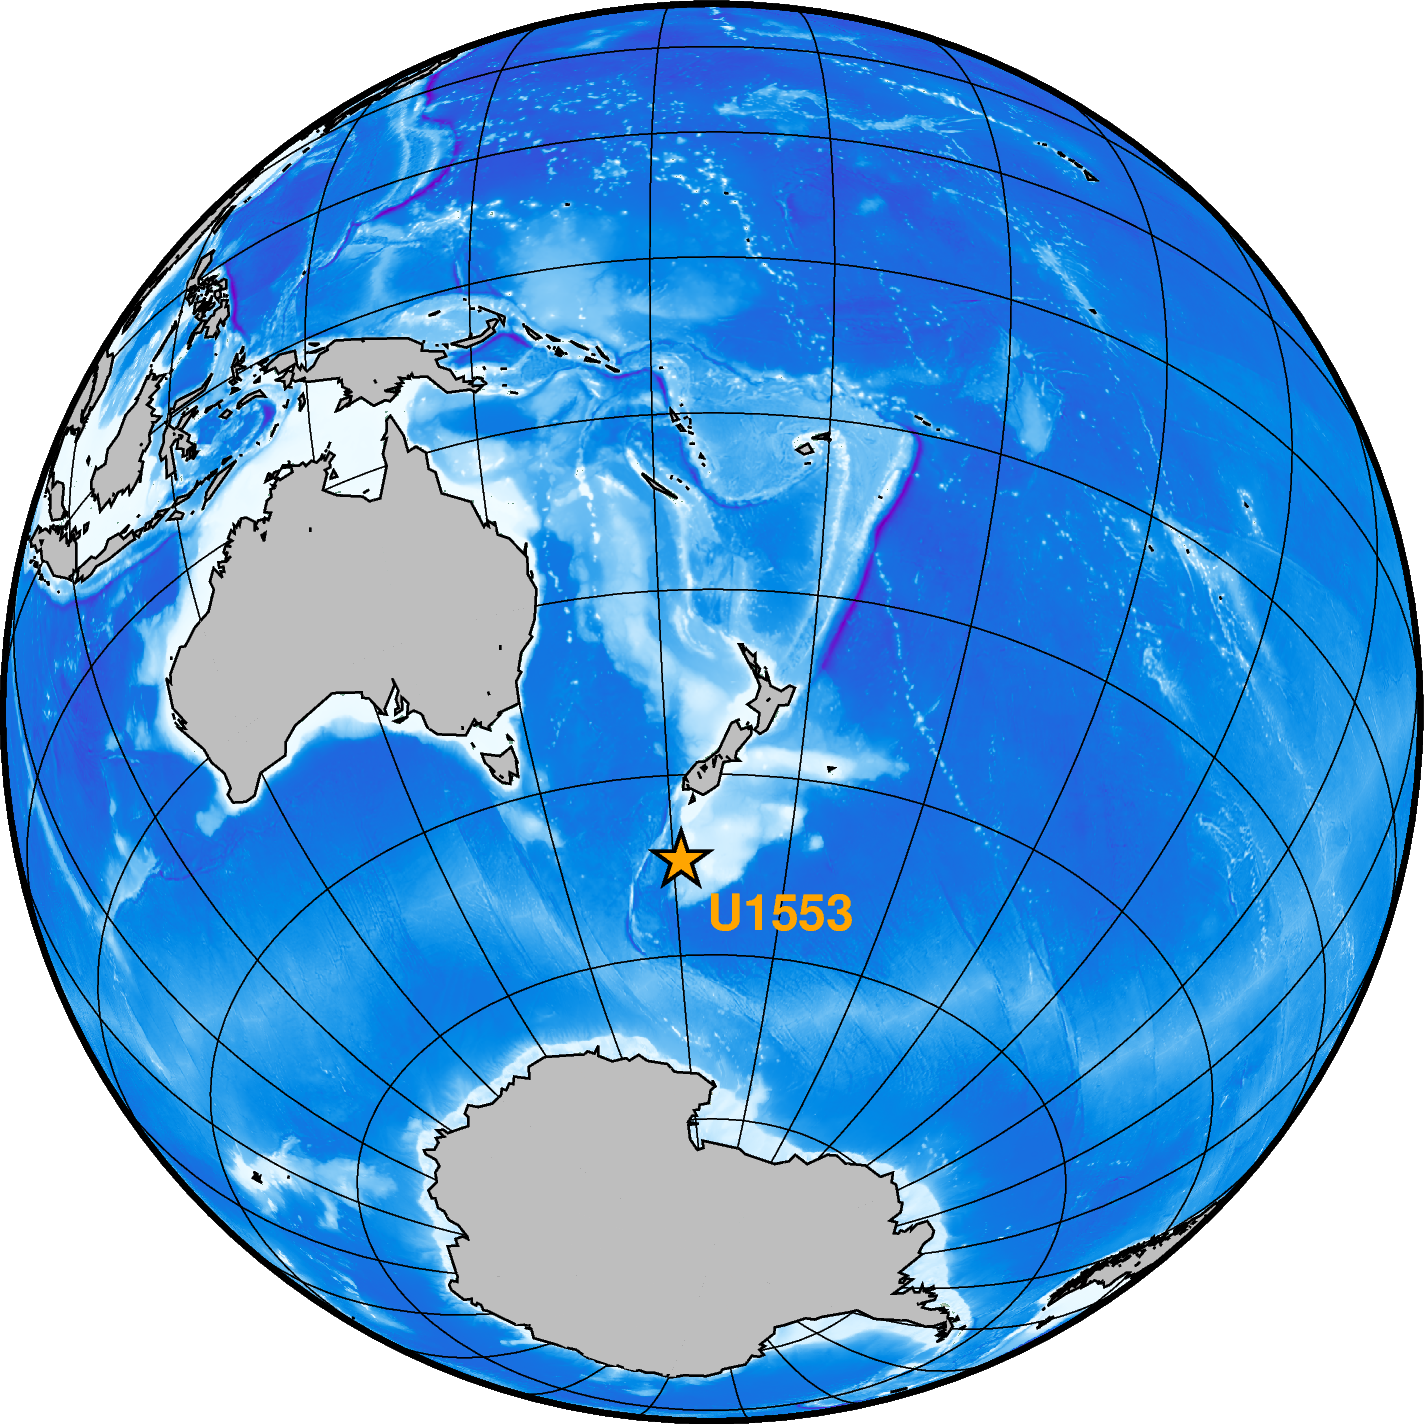

In [22]:
grad= pygmt.datasets.load_earth_relief(resolution="06m")

fig = pygmt.Figure()
fig.grdimage(grid=grad, projection="G170/-40/12c" ,region="g", cmap="terra", frame="ag")
fig.coast(frame=True, shorelines=0.5, land="grey")
fig.plot(x=166, y=-52, style="a0.5c", fill="orange", pen="0.8p,black")

# Add a label for the drilling hole
fig.text(x=180, y=-56, text="U1553", font="12p,Helvetica-Bold, orange", justify="CM")

fig.show()
